# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
data = pd.read_csv("cancer_reg.csv")
house = pd.read_csv("avg-household-size.csv")

In [3]:
data['geography']

0          Kitsap County, Washington
1        Kittitas County, Washington
2       Klickitat County, Washington
3           Lewis County, Washington
4         Lincoln County, Washington
                    ...             
3042        Ellsworth County, Kansas
3043           Finney County, Kansas
3044             Ford County, Kansas
3045         Franklin County, Kansas
3046            Geary County, Kansas
Name: geography, Length: 3047, dtype: object

In [4]:
# Display the first 5 rows of the dataset
data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [6]:
data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [7]:
house.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


In [9]:
print(house["statefips"].value_counts())
print(house["geography"].value_counts())

48    254
13    159
51    133
21    120
29    115
20    105
17    102
37    100
19     99
47     95
31     93
18     92
39     88
27     87
26     83
28     82
72     78
40     77
5      75
55     72
1      67
12     67
42     67
46     66
22     64
8      64
36     62
6      58
30     56
54     55
38     53
45     46
16     44
53     39
41     36
35     33
49     29
2      29
24     24
56     23
34     21
32     17
23     16
4      15
25     14
50     14
33     10
9       8
44      5
15      5
10      3
11      1
Name: statefips, dtype: int64
Aleutians East Borough, Alaska    1
Delaware County, Oklahoma         1
Cherokee County, Oklahoma         1
Choctaw County, Oklahoma          1
Cimarron County, Oklahoma         1
                                 ..
Menifee County, Kentucky          1
Mercer County, Kentucky           1
Metcalfe County, Kentucky         1
Monroe County, Kentucky           1
Weston County, Wyoming            1
Name: geography, Length: 3220, dtype: int64


In [10]:
data_cat = data[["binnedinc", "geography"]]
data_cat.head(10)
print(data_cat["binnedinc"].value_counts())
print("\n")
print(data_cat["geography"].value_counts())

(54545.6, 61494.5]    306
[22640, 34218.1]      306
(45201, 48021.6]      306
(48021.6, 51046.4]    305
(42724.4, 45201]      305
(51046.4, 54545.6]    305
(37413.8, 40362.7]    304
(40362.7, 42724.4]    304
(34218.1, 37413.8]    304
(61494.5, 125635]     302
Name: binnedinc, dtype: int64


Kitsap County, Washington            1
Ralls County, Missouri               1
Pemiscot County, Missouri            1
Perry County, Missouri               1
Pettis County, Missouri              1
                                    ..
San Bernardino County, California    1
Cullman County, Alabama              1
San Diego County, California         1
San Francisco County, California     1
Geary County, Kansas                 1
Name: geography, Length: 3047, dtype: int64


In [11]:
# Group states into 5 groups (Region): Northeast (N), Midwest (MID), South (S), West (W) and Puerto Rico (PR).
# Convert statefips to Region
mapping = {code: 'N' for code in [9, 23, 25, 33, 34, 36, 42, 44, 50]}
mapping.update({code: 'MID' for code in [17, 18, 19, 20, 26, 27, 29, 31, 38, 39, 46, 55]})
mapping.update({code: 'S' for code in [1, 5, 10, 11, 12, 13, 21, 22, 24, 28, 37, 40, 45, 47, 48, 51, 54]})
mapping.update({code: 'W' for code in [2, 4, 6, 8, 15, 16, 30, 32, 35, 41, 49, 53, 56]})
mapping.update({72: 'PR'})

house['statefips'] = house['statefips'].replace(mapping)
house['statefips'] = house['statefips'].astype(str)

In [12]:
# Replace geography by Region
merge_df = pd.merge(data, house, on='geography', how='left')
data['geography'] = merge_df['statefips']

In [13]:
pip install category_encoders

In [14]:
# One-hot Encoding 

import category_encoders as ce
import pandas as pd

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='geography',handle_unknown='return_nan',return_df=True,use_cat_names=True)

data = encoder.fit_transform(data)

In [15]:
# Because we have feature medincome and feature binnedinc is not necessary, so i delete it.

data = data.drop(columns = ['binnedinc'])


In [16]:
# Check for missing values
data.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
medianage                     0
medianagemale                 0
medianagefemale               0
geography_W                   0
geography_S                   0
geography_MID                 0
geography_N                   0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian

In [17]:
# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)

# Convert back to DataFrame
data_imputed = pd.DataFrame(data_imputed)

In [18]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3047 non-null   float64
 1   1       3047 non-null   float64
 2   2       3047 non-null   float64
 3   3       3047 non-null   float64
 4   4       3047 non-null   float64
 5   5       3047 non-null   float64
 6   6       3047 non-null   float64
 7   7       3047 non-null   float64
 8   8       3047 non-null   float64
 9   9       3047 non-null   float64
 10  10      3047 non-null   float64
 11  11      3047 non-null   float64
 12  12      3047 non-null   float64
 13  13      3047 non-null   float64
 14  14      3047 non-null   float64
 15  15      3047 non-null   float64
 16  16      3047 non-null   float64
 17  17      3047 non-null   float64
 18  18      3047 non-null   float64
 19  19      3047 non-null   float64
 20  20      3047 non-null   float64
 21  21      3047 non-null   float64
 22  

In [19]:
X = data_imputed.drop(columns = 2).values
y = data["target_deathrate"].values
y = y.reshape(-1,1)

In [20]:
N, d = X.shape

print("Num. samples: ", N)
print("Num. features/variables: ", d)

Num. samples:  3047
Num. features/variables:  34


In [21]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
sc = StandardScaler()
X_std = sc.fit_transform(X)
y_std = sc.fit_transform(y)

# Implement PCA

In [22]:
from sklearn.decomposition import PCA
# Implement PCA
pca = PCA()
pca.fit(X_std)

PCA()

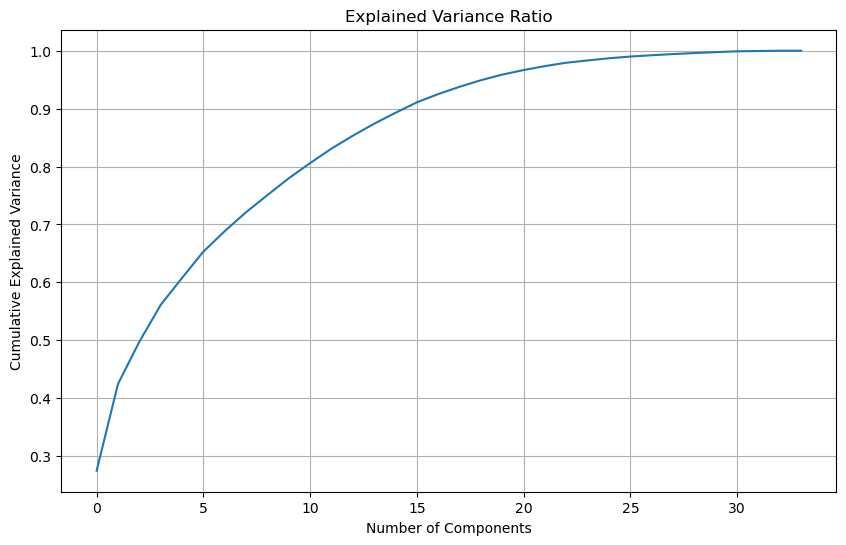

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Dimensionality Reduction

In [24]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.27477103, 0.42449515, 0.49746395, 0.5610937 , 0.60765336,
       0.65304562, 0.68846384, 0.72121232, 0.75071053, 0.77977888,
       0.80596319, 0.8309779 , 0.85325621, 0.87395857, 0.89289998,
       0.91086383, 0.925154  , 0.93768626, 0.94908238, 0.9587543 ,
       0.96661592, 0.97346444, 0.979273  , 0.98322922, 0.98698975,
       0.98993487, 0.99221135, 0.99421801, 0.99596548, 0.99756302,
       0.998966  , 0.99949959, 1.        , 1.        ])

In [25]:
d = np.argmax(cumsum >= 0.8) + 1
d

11

In [26]:
pca = PCA(n_components = d)
X_reduced = pca.fit_transform(X_std)

In [27]:
print('Number of Components: ', pca.n_components_)
print('Explained Variance Ratio: ', np.sum(pca.explained_variance_ratio_))

Number of Components:  11
Explained Variance Ratio:  0.8059630924619383


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_std, test_size=0.2, random_state = 30)

In [29]:
nCol = X_train.shape[1]
X_train = X_train.reshape(-1,nCol)
X_test = X_test.reshape(-1,nCol) 

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_test: {y_test.shape}")

Training size: 	X_train: (2437, 11) 	y_train: (2437, 1)
Testing size: 	X_test: (610, 11) 	y_test: (610, 1)


In [30]:
from sklearn.model_selection import train_test_split
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_std, y_std, test_size=0.2, random_state = 30)

In [31]:
nCol = X_train_orig.shape[1]
X_train_orig = X_train_orig.reshape(-1,nCol)
X_test_orig = X_test_orig.reshape(-1,nCol) 

y_train_orig = y_train_orig.reshape(-1,1)
y_test_orig = y_test_orig.reshape(-1,1)

print(f"Training size: \tX_train: {X_train_orig.shape} \ty_train: {y_train_orig.shape}")
print(f"Testing size: \tX_test: {X_test_orig.shape} \ty_test: {y_test_orig.shape}")

Training size: 	X_train: (2437, 34) 	y_train: (2437, 1)
Testing size: 	X_test: (610, 34) 	y_test: (610, 1)


In [32]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import time


# Function to compute evaluation metrics of Linear Regression and Random Forest Regressor models
def perform(test,label):
    results={}
    def test_model(clf): 
        cv = KFold(n_splits=10,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, test, label, cv=cv,scoring=r2)
        scores= r2_val_score.mean()
        return scores

    clf = LinearRegression()
    t0 = time.time()
    clf.fit(test, label)
    t1 = time.time()
    results["Linear"]=[test_model(clf),t1-t0]
    
    
    clf = RandomForestRegressor()
    t0 = time.time()
    clf.fit(test, label)
    t1 = time.time()
    results["RandomForest"]=[test_model(clf),t1-t0]
   
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score", "Time"] 
    return results



In [33]:
print("Original data - Test set \n")
y_test_orig = np.ravel(y_test_orig)
perform(X_test_orig, y_test_orig)

Original data - Test set 



,R Square Score,Time
Linear,0.511789,0.006980
RandomForest,0.509810,1.386921


In [34]:
print('Dimensionality reduction - Test set: \n')
y_test = np.ravel(y_test)
perform(X_test,y_test)

Dimensionality reduction - Test set: 



,R Square Score,Time
Linear,0.441378,0.036261
RandomForest,0.412459,0.737750


In [35]:
print("Original data - Train set: \n")
y_train_orig = np.ravel(y_train_orig)
perform(X_train_orig, y_train_orig)

Original data - Train set: 



,R Square Score,Time
Linear,0.523295,0.004961
RandomForest,0.523191,7.343707


In [36]:
print('Dimensionality reduction - Train set: \n')
y_train = np.ravel(y_train)
perform(X_train, y_train)


Dimensionality reduction - Train set: 



,R Square Score,Time
Linear,0.467094,0.066168
RandomForest,0.482813,4.632084


# Interpretation and Analysis


In [37]:
# The Explained Variance Ratio

print("Explained Variance Ratio: \n")
pca.explained_variance_ratio_

Explained Variance Ratio: 



array([0.27477103, 0.14972412, 0.0729688 , 0.06362975, 0.04655966,
       0.04539227, 0.03541821, 0.03274847, 0.0294982 , 0.02906834,
       0.02618425])

In [38]:
# The cumulative proportion of variance. A high cumulative explained variance ratio indicates that the retained components 

print("The cumulative proportion of variance: \n")
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

The cumulative proportion of variance: 



array([0.27477103, 0.42449515, 0.49746395, 0.5610937 , 0.60765335,
       0.65304562, 0.68846384, 0.7212123 , 0.7507105 , 0.77977885,
       0.80596309])

In [39]:
# Determine the number of principal components to retain based on the predefined threshold for explained variance ratio.
# Reduce 31 to 10 dimensions to retain 80% of the information.

print('Number of Components: ', pca.n_components_)
print('Explained Variance Ratio: ', np.sum(pca.explained_variance_ratio_))

Number of Components:  11
Explained Variance Ratio:  0.8059630924619383


In [40]:
# Interpret the principal components and their corresponding eigenvectors

print("Principal components (eigen vectors):")
for i, component in enumerate(pca.components_):
    print("Principal Component", i+1)
    print(component)


Principal components (eigen vectors):
Principal Component 1
[ 0.09220895  0.06823983  0.00197917  0.27790085  0.07179028 -0.28429454
  0.03393267 -0.00596137 -0.01812434 -0.04054471  0.01754543 -0.15764322
  0.12115439  0.0589139   0.15866973 -0.14546418 -0.1059969   0.07188405
  0.18869713 -0.13483816  0.24164212  0.27209756 -0.22379608  0.29598804
  0.27710631  0.27444138 -0.27365689 -0.28785817  0.13963562 -0.15255889
  0.11011659 -0.00324373  0.16045778 -0.00181895]
Principal Component 2
[ 0.26260858  0.28650598  0.0302505   0.05972969  0.28804555  0.12311028
  0.03240571 -0.04095674 -0.27804723 -0.26740986  0.05155723  0.08485458
 -0.15597419  0.05358097 -0.30098759 -0.07354503 -0.15552342  0.07838377
  0.12115744 -0.2482515   0.1591139   0.01432759  0.1505258  -0.06650378
  0.01560226  0.03892076 -0.08524519  0.05203206 -0.30265551  0.22341636
  0.24973983  0.15556774 -0.24661992 -0.04305041]
Principal Component 3
[ 0.40503031  0.40754006 -0.01646002  0.00115664  0.39505966 -0.07

# Trade-offs observed between dimensionality reduction and model performance
- Dimensionality reduction involves a trade-off between simplifying the data and preserving important information. However, this process also involves some degree of information loss, which lead to inaccurate models or misleading results.
- Trade-off between complexity and accuracy. As reducing too many dimensions lead to underfitting or poor generalization, where the model is overly simplified and fails to capture the complexity of the data. But its help to less computation time and faster training due to fewer data


# Conclusion

- There are two main types of data dimensionality reduction methods: feature selection and feature extraction. Feature selection involves selecting a subset of the original features that are most relevant and informative for the data analysis, while discarding the rest. Feature extraction involves transforming the original features into a new set of features that capture the most important information and variation in the data, while reducing the dimensionality. In this assignment, PCA is one of the examples of feature extraction methods.
- Data dimensionality reduction involves some trade-offs and challenges. Such as loss of information or distortion of data due to transformation of high-dimensional data into low-dimensional space, Trade-off between complexity and accuracy,...Therefore, dimension reduction should be applied carefully and appropriately depending on the data and the machine learning task.

- Dimensionality reduction does not always speed up training: it depends on the data, model, and training technique. In the results obtained from the two models, dimensionality reduction improves the time, but not always, and the performance always degrades slightly.


# Visualizations

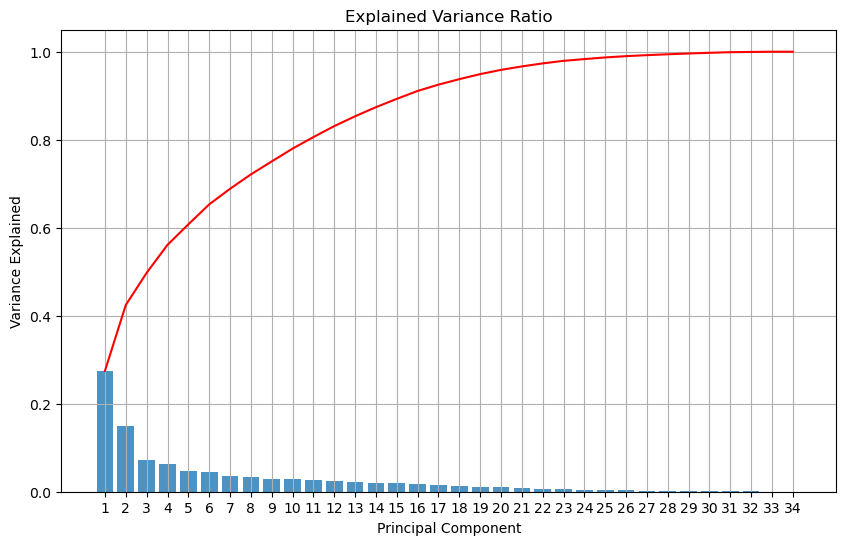

In [41]:
pca = PCA()
pca.fit(X_std)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, label = 'Variance Explained')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, linestyle='-', color='r', label = 'Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

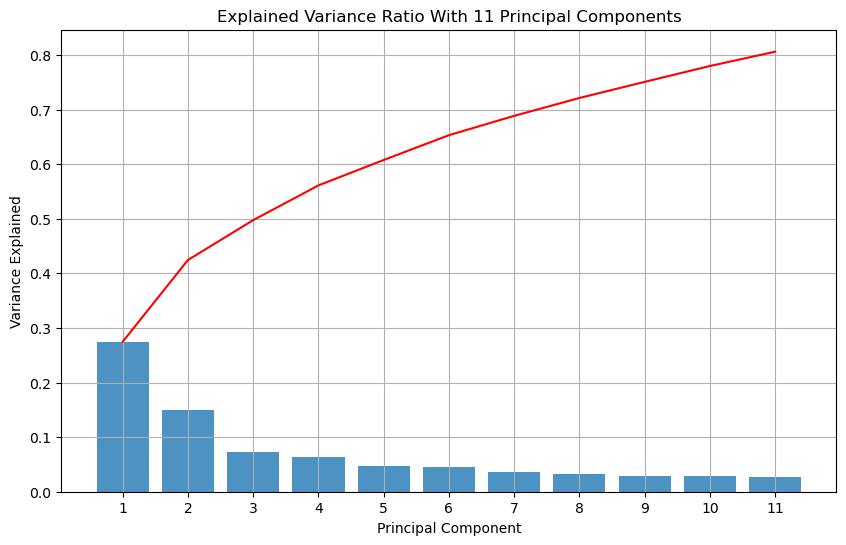

In [42]:
pca = PCA(n_components = 11)
pca.fit(X_std)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, label = 'Variance Explained')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, linestyle='-', color='r', label = 'Cumulative Explained Variance')
plt.title('Explained Variance Ratio With 11 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# The importance of PCA in the context of dimensionality reduction and its implications for real-world data analysis
- PCA is a statistical method that transforms high-dimensional data into a lower-dimensional form while preserving the most important information. It accomplishes this by identifying new axes, called principal components, along which the data varies the most. These components are orthogonal to each other, meaning they are uncorrelated, making them a powerful tool for dimensionality reduction.
- Visualizing high-dimensional data is a challenge. PCA offers a solution by transforming the data into a lower-dimensional space that can be visualized using familiar techniques like scatter plots. This allows data analysts to explore relationships between variables and identify clusters or outliers more effectively.
- PCA can interpret data by revealing the underlying factors and features that explain the variation in data. Using PCA to examine the loadings of the original variables on the PCs, and see how they contribute to each PC. The loadings are the coefficients of the linear combinations that form the PCs. You can also use PCA to examine the scores of the data points on the PCs, and see how they relate to each PC.
- In real-world data analysis, PCA's implications are vast. Although not always, but in many cases, it enables more efficient storage and computation of data, enhances model interpretability, improves model performance, and facilitates exploratory data analysis and visualization. By effectively reducing the dimensionality of data while preserving important information, PCA plays a critical role in extracting meaningful insights from complex datasets.
